# Task01: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

In [1]:
from IPython.display import Image
import numpy as np
import scipy as sp
import cv2
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.pyplot as plt
import time


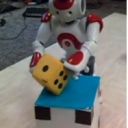

In [2]:
Image(filename='NAORelease.jpg')

In [3]:
class compare_KMeans():
    def __init__ (self,filename):
        image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
        image = np.array(image, dtype=np.float64) / 255
        self.width = image.shape[0]
        self.height = image.shape[1]
        self.image= image.reshape((self.width * self.height, image.shape[2]))
        
    def skLearn_Kmeans(self,k):
        t0 = time.time()
        kmeans = KMeans(n_clusters = k).fit(self.image)
        labels = kmeans.predict(self.image)
        cluster_centers = kmeans.cluster_centers_
        compressed_image = np.reshape(cluster_centers[labels],\
                                      (self.width, self.height,\
                                       cluster_centers.shape[1])\
                                     )
        t1 = time.time()-t0
        return compressed_image, t1
    
    def _Kmeans(self, k, MAX_ITERATIONS=200):
        t0 = time.time()
        np.random.seed(0)
        center_idx = np.random.randint(self.image.shape[0], size=k)
        means=self.image[center_idx,:]
        clustered_data=self.image
        clustered_data=np.insert(clustered_data, 3, -1, axis= 1)
        
        iteration=0
        while(True):
            iteration+=1
            distances = sp.spatial.distance.cdist(self.image,means)
            clustered_data[:,3]=np.argmin(distances, axis=1)
            old_means=means.copy()
            for i,cluster in enumerate(np.unique(clustered_data[:,3])):
                data_in_cluster=clustered_data[np.where(clustered_data[:,3]==cluster)]
                means[i]=np.mean(data_in_cluster[:,:3],axis=0)
             
            if iteration>=MAX_ITERATIONS or np.allclose(old_means,means):
                break
                
        distances = sp.spatial.distance.cdist(self.image,means)
        clustered_data[:,3]=np.argmin(distances, axis=1)
        compressed_image = self.image.copy()
        for i,cluster in enumerate(np.unique(clustered_data[:,3])):
            idx=np.where(clustered_data[:,3]==cluster)
            compressed_image[idx] = means[i]
        compressed_image =  np.reshape(compressed_image, \
                                       (self.width, self.height,\
                                        means.shape[1]))
        #print "Total iterations: ",iteration
        t1 = time.time()-t0
        return compressed_image, t1

In [4]:
Kmean_compare = compare_KMeans('NAORelease.jpg')

In [5]:
K = np.arange(0, 22, 2)[1:]
sk_compressed = list()
self_compressed = list()

for k in K:
    sk_img,sk_time=Kmean_compare.skLearn_Kmeans(k)
    self_img,self_time=Kmean_compare._Kmeans(k)
    sk_compressed.append(np.array([sk_img,sk_time]))
    self_compressed.append(np.array([self_img,self_time]))


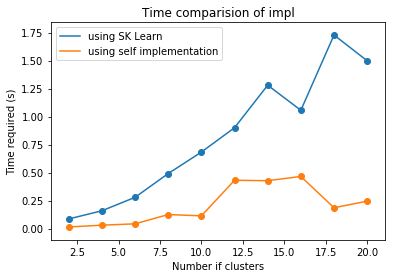

In [6]:
plt.plot(K,np.array(sk_compressed[:])[:,1],label = "using SK Learn")
plt.scatter(K,np.array(sk_compressed[:])[:,1])
plt.plot(K,np.array(self_compressed[:])[:,1],label = "using self implementation")
plt.scatter(K,np.array(self_compressed[:])[:,1])
plt.title("Time comparision of impl")
plt.xlabel("Number if clusters")
plt.ylabel("Time required (s)")
plt.legend()
plt.show()

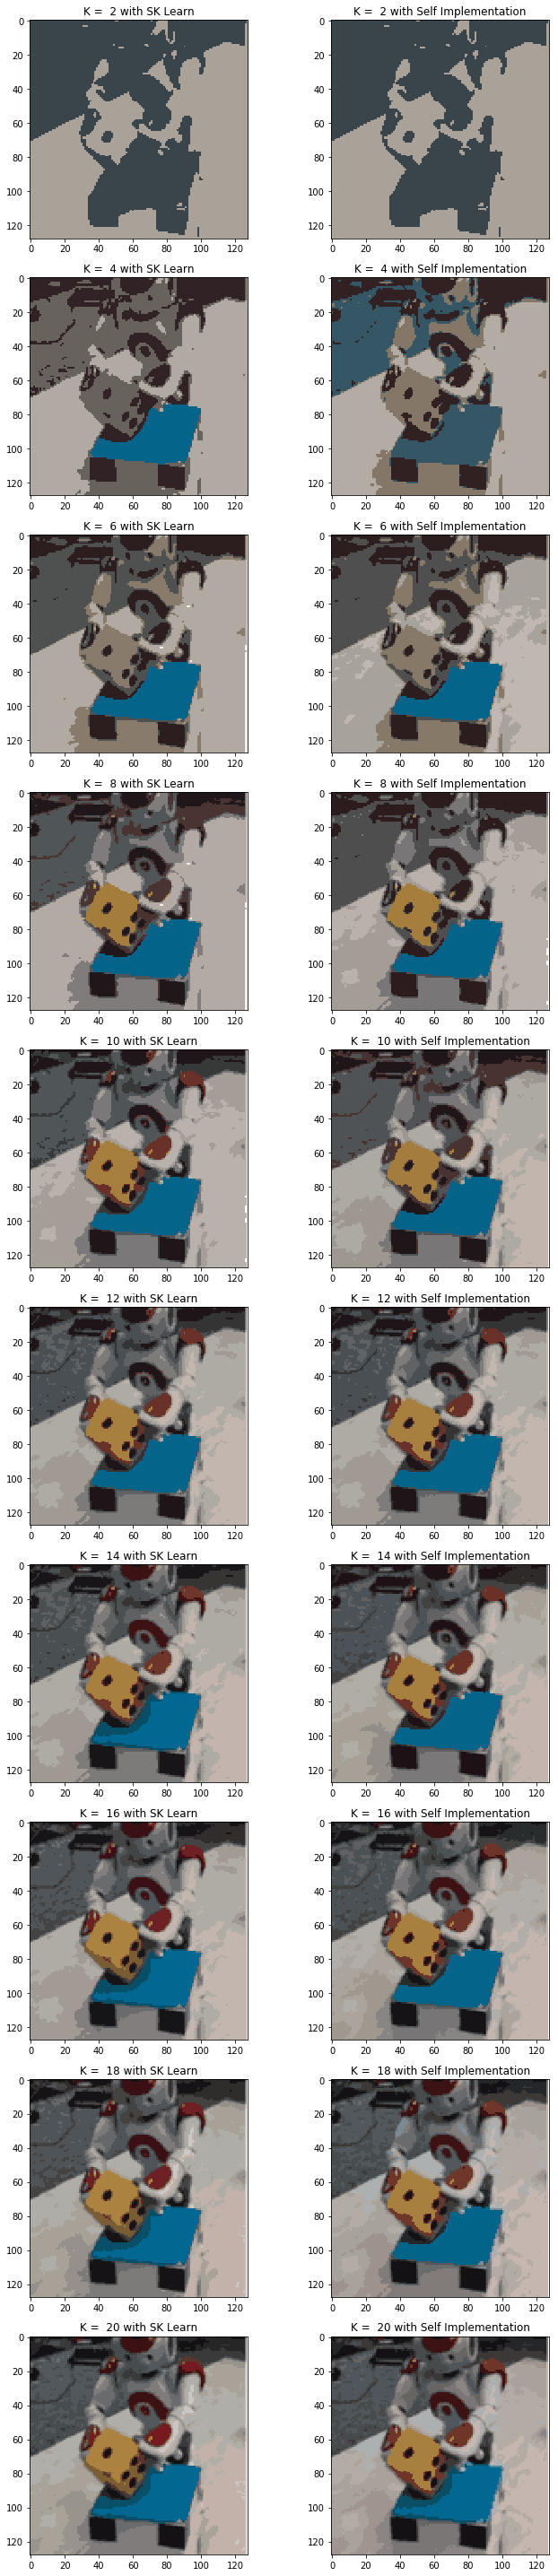

In [7]:
images_sk=np.array(sk_compressed[:])[:,0]
images_self=np.array(self_compressed[:])[:,0]
figure = plt.figure(figsize=(10,40))

img_number = 1
for i in np.arange(0,len(K),1):
    plt.subplot(10,2,2*i+1)
    plt.title('K =  %i with SK Learn'%K[i])
    plt.imshow(images_sk[i])
    plt.subplot(10,2,2*i+2)
    plt.title('K =  %i with Self Implementation'%K[i])
    plt.imshow(images_self[i])
plt.tight_layout()
plt.show()